In [1]:
#Limpiza nueva

In [1]:
#!pip install --upgrade spacy
#!python -m spacy download es_core_news_sm
import spacy

# Cargar el modelo de idioma español de SpaCy
nlp = spacy.load('es_core_news_sm')

import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

# Inicializar el tokenizador
tokenizer = ToktokTokenizer()

# Descargar la lista de stopwords en español de NLTK
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /Users/sil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# con la limpieza inical sacamos estos datos para limpiar mensaje

In [2]:
df = pd.read_csv("../data/Limpieza_inicial_chat.csv")
df

,Unnamed: 0,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Letras,Palabras
0,0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,143,23
1,1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,51,7
2,2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,26,4
3,3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Holiiii!!!,10,1
4,4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,56,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,13/03/2024,Miercoles,13,3,Mar,2024,10:48:24,Alana Ironhack,Jajaj,5,1
2642,2642,13/03/2024,Miercoles,13,3,Mar,2024,10:48:50,Alana Ironhack,Totalmente,10,1
2643,2643,13/03/2024,Miercoles,13,3,Mar,2024,10:48:59,Alana Ironhack,Eso no es impedimento,21,4
2644,2644,13/03/2024,Miercoles,13,3,Mar,2024,10:51:02,Sil🐨,La mujer así,12,3


In [33]:
# Dividir cada mensaje en palabras y contar la cantidad de palabras
df['Num_palabra'] = df['Mensaje'].str.split().apply(len)
df

,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Num_palabra
0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,23
1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,7
2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,4
3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Hola,1
4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,11
...,...,...,...,...,...,...,...,...,...,...
1769,17/02/2024,Sabado,17,2,Feb,2024,21:09:53,Sil🐨,No y que también pensaba que esos días que íba...,12
1770,17/02/2024,Sabado,17,2,Feb,2024,21:11:04,Alana Ironhack,Jajaj,1
1771,17/02/2024,Sabado,17,2,Feb,2024,21:11:18,Alana Ironhack,Disfrutar de tu libertad,4
1772,17/02/2024,Sabado,17,2,Feb,2024,21:18:17,Sil🐨,JAJAJAJAJA,1


# Eliminamos acentos

In [4]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

# cambiamos abreviaturas

In [5]:
# abreviaturas

CONTRACCIONES_ESP = {
"xq": "porque",
"Holiiii": "Hola",
"sticker omitido": "imagen",
"imagen omitida": "imagen",
"q": "que",
"X": "por",
"x": "por",
"esq": "es que",
"GIF omitido": "GIF",
"Valee": "vale",
"perfe": "perfecto",
"Siiii": "Si",
"siii": "Si",
"Ayyy":"Ay",
"proque": "porque",
"nose": "no se",
"tmbn": "tambien",
"lab": "laboratorio",
"labs": "labboratotios",
"lst": "lista",
"reu": "reunion",
"michi": "gato",
"jaajaaj": "jajajajaja",
"xd": "risa",
"capiiis": "capi",
"smpr": "siempre",
"Noup": "No",
"okii": "vale",
"year": "año",
"string": "letras",
"colorinchis": "colores",
"pull request": "subir",
"LOL": "risa a carcajadas",
"Wsp": "WhatsApp",
"Wasap": "WhatsApp",
"wa": "WhatsApp",
"Guasap": "WhatsApp",
"Pq": "porque",
"Xq": "porque",
"q": "que",
"Dnd": "donde",
"K": "que",
"T": "te",
"+/-": "mas o menos",
"Nd": "nada",
"Vdd": "verdad",
"Ntp": "no te preocupes",
"Tqm": "Te quiero mucho",
"Tq": "Te quiero",
"Tmb": "tambien",
"Dps": "despues",
"Xfa": "por favor",
"Dd": "donde",
"Oki": "vale",
"Ok": "vale",
"Tkt": "tranquilo",
"Tqg": "te quiero un monton",
"Bss": "besos",
"Tmbn": "tambien",
"Fvr": "favor",
"Msj": "mensaje",
"LMAO": "risa",
"BRB": "Vuelvo enseguida",
"IDK": "no se",
"idk": "no se",
"ASAP": "tan pronto como sea posible",
"OMG": "Oh Dios mio",
"BFF": "Mejores amigos para siempre",
"Okey": "vale"
    }

In [6]:
def corregir_abreviaturas(texto, mapeo_abreviaturas=CONTRACCIONES_ESP):
    texto_corregido = []
    for palabra in texto.replace(".","").split():
        palabra_corregida = mapeo_abreviaturas.get(palabra.lower(), palabra)
        if palabra_corregida is not None:
            texto_corregido.append(palabra_corregida)
        else:
            texto_corregido.append(palabra)
    return ' '.join(texto_corregido)
# Llamar a la función corregir_abreviaturas con el diccionario de abreviaturas
a = corregir_abreviaturas( 'Q tal. okey xq.')
print(a)

que tal okey porque


# caracteres especiales

In [7]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("¡Bueno, esto fue divertido! ¿Qué opinas? 123#@!", 
                          remove_digits=True)

'Bueno esto fue divertido Qu opinas '

# Text lemmatization

In [8]:
# Importar NLTK
import nltk
from nltk.stem import SnowballStemmer

# Crear una instancia de SnowballStemmer para español
stemmer_es = SnowballStemmer('spanish')

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text('Mi sistema sigue fallando. El suyo falló ayer, el nuestro falla diariamente.')

'mi sistema seguir fallar . el suyo fallar ayer , el nuestro falla diariamente .'

# Text stemming

In [9]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer('Mi sistema sigue fallando. El suyo falló ayer, el nuestro falla diariamente.')

'mi sistema sigu fallando. el suyo falló ayer, el nuestro falla diariamente.'

# Remove stopwords

In [10]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("De, y, si son palabras vacías, la computadora no lo es")

', , si palabras vacías , computadora'

# Building a text normalizer

In [11]:
def normalize_corpus(corpus, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = corregir_abreviaturas(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus


# Pre-process and normalize news articles

In [12]:
df["Mensaje"]

0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                              Holiiii!!!
4       Les paso las fotos de ayer prepárense xq es un...
                              ...                        
2641                                                Jajaj
2642                                           Totalmente
2643                                Eso no es impedimento
2644                                         La mujer así
2645                                       Bueno que sale
Name: Mensaje, Length: 2646, dtype: object

In [13]:
df['clean_text'] = normalize_corpus(df['Mensaje'])
#norm_corpus = list(df['Mensaje'])
df.iloc[1][['Mensaje', 'clean_text']].to_dict()
#news_df.iloc[1]['clean_text'].to_dict()
df

,Unnamed: 0,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Letras,Palabras,clean_text
0,0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,143,23,mensaje llamada cifrado extremo extremo nadie ...
1,1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,51,7,aln ironhack creer grupo capibara ironhack
2,2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,26,4,aln ironhack t anadio
3,3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Holiiii!!!,10,1,holiiii
4,4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,56,11,l pasar foto ayer preparense ser bombardeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,13/03/2024,Miercoles,13,3,Mar,2024,10:48:24,Alana Ironhack,Jajaj,5,1,jajaj
2642,2642,13/03/2024,Miercoles,13,3,Mar,2024,10:48:50,Alana Ironhack,Totalmente,10,1,totalmente
2643,2643,13/03/2024,Miercoles,13,3,Mar,2024,10:48:59,Alana Ironhack,Eso no es impedimento,21,4,ser impedimento
2644,2644,13/03/2024,Miercoles,13,3,Mar,2024,10:51:02,Sil🐨,La mujer así,12,3,mujer asi


# Nube de palabras

In [14]:
# Nube de palabras
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

#!pip install wordcloud
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

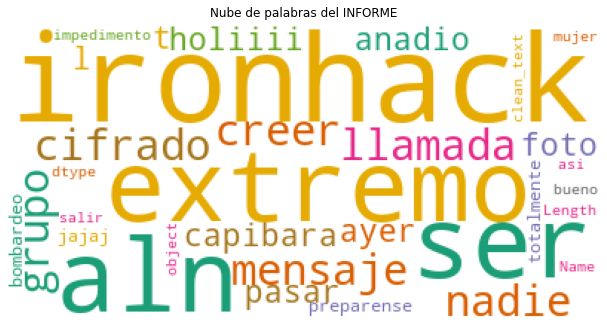

In [18]:
# Convertimos la lista palabras a string para utilizar la función WordCloud
palabras = df['clean_text']
wc=str(palabras)
#Generamos la nube de palabras
word_cloud = WordCloud(background_color="white", colormap="Dark2",max_font_size=200, random_state=42).generate(wc)
#Mostramos la Nube de palabras
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Nube de palabras del INFORME')
ax1.imshow(word_cloud)
ax1.axis('off')

# exportar datos limpios

In [19]:
# Exportamos los datos limpios en un archivo csv
df.to_csv('../data/data_chat_clear_text.csv', header=True, index=False)

# analisis con TextBlob

In [20]:
from textblob import TextBlob

In [21]:
mensajes = df['clean_text'].tolist()

# Lista para almacenar los sentimientos de cada mensaje
sentimientos = []

# Iterar sobre cada mensaje y calcular el sentimiento
for texto in mensajes:
    blob = TextBlob(texto)
    sentimiento = blob.sentiment.polarity
    if sentimiento > 0:
        sentimientos.append("positivo")
    elif sentimiento < 0:
        sentimientos.append("negativo")
        
    elif sentimiento == 0:
        sentimientos.append("neutro")

# Imprimir los mensajes y sus sentimientos correspondientes
for i, mensaje in enumerate(mensajes):
    #print("Mensaje:", mensaje)
    #print("Sentimiento:", sentimientos[i])
    #print()
    # Agregar los sentimientos al DataFrame original
    df['texBlod'] = sentimientos


df


,Unnamed: 0,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Letras,Palabras,clean_text,texBlod
0,0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,143,23,mensaje llamada cifrado extremo extremo nadie ...,neutro
1,1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,51,7,aln ironhack creer grupo capibara ironhack,neutro
2,2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,26,4,aln ironhack t anadio,neutro
3,3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Holiiii!!!,10,1,holiiii,neutro
4,4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,56,11,l pasar foto ayer preparense ser bombardeo,neutro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,13/03/2024,Miercoles,13,3,Mar,2024,10:48:24,Alana Ironhack,Jajaj,5,1,jajaj,neutro
2642,2642,13/03/2024,Miercoles,13,3,Mar,2024,10:48:50,Alana Ironhack,Totalmente,10,1,totalmente,neutro
2643,2643,13/03/2024,Miercoles,13,3,Mar,2024,10:48:59,Alana Ironhack,Eso no es impedimento,21,4,ser impedimento,neutro
2644,2644,13/03/2024,Miercoles,13,3,Mar,2024,10:51:02,Sil🐨,La mujer así,12,3,mujer asi,neutro


In [22]:
# Lista para almacenar los sentimientos de cada mensaje
sentimientos = {"positivo": 0, "negativo": 0, "neutro": 0}

# Iterar sobre cada mensaje y calcular el sentimiento
for texto in mensajes:
    blob = TextBlob(texto)
    sentimiento = blob.sentiment.polarity
    if sentimiento > 0:
        sentimientos["positivo"] += 1
        #print("---->", texto)
    elif sentimiento < 0:
        sentimientos["negativo"] += 1
        #print("---->", 'Alerta') 
        
    else: 
        sentimientos["neutro"] += 1
        #print("---->", texto)

# Imprimir el recuento de sentimientos
for sentimiento, count in sentimientos.items():
    print(f"Sentimiento {sentimiento}: {count}")

Sentimiento positivo: 41
Sentimiento negativo: 19
Sentimiento neutro: 2586


In [23]:
sentimientos

{'positivo': 41, 'negativo': 19, 'neutro': 2586}

# vamos a probar con VADER

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
valores_de_sentimiento = {
    "feliz": 0.7,
    "bien": 0.5,
    "genial": 0.8,
    "triste": -0.7,
    "cabreado": -0.8,
    "mal": -0.5,
    "espero": 0,
    "caer": -0.1,
    "gripe": -0.1,
    "malo": -0.2,
    "vale perfecto": 0.8,
    "jajajajaja": 0.1,
}


In [26]:
# Define una función para calcular un resumen del análisis de sentimientos
def calcular_sentimiento_vader(texto):
    # Asegurarse de que el texto sea una cadena de texto
    if isinstance(texto, str):
        ### Analizando el sentimiento con VADER
        sia = SentimentIntensityAnalyzer()
        # Calcular los sentimientos utilizando VADER
        sentimientos = sia.polarity_scores(texto)
        # Devolver el sentimiento dominante
        if sentimientos['compound'] >= 0.05:
            return 'positivo'
        elif sentimientos['compound'] <= -0.05:
            return 'negativo'
        elif sentimientos['compound'] == 0.00:
            return 'neutro'
    else:
        return 'no aplicable'  # O cualquier otro valor que desees para casos donde el texto no sea una cadena de texto

# Aplicar la función a cada mensaje en el DataFrame
df['sentimiento_vader'] = df['clean_text'].apply(calcular_sentimiento_vader)
df

,Unnamed: 0,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Letras,Palabras,clean_text,texBlod,sentimiento_vader
0,0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,143,23,mensaje llamada cifrado extremo extremo nadie ...,neutro,positivo
1,1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,51,7,aln ironhack creer grupo capibara ironhack,neutro,neutro
2,2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,26,4,aln ironhack t anadio,neutro,neutro
3,3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Holiiii!!!,10,1,holiiii,neutro,neutro
4,4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,56,11,l pasar foto ayer preparense ser bombardeo,neutro,positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,13/03/2024,Miercoles,13,3,Mar,2024,10:48:24,Alana Ironhack,Jajaj,5,1,jajaj,neutro,neutro
2642,2642,13/03/2024,Miercoles,13,3,Mar,2024,10:48:50,Alana Ironhack,Totalmente,10,1,totalmente,neutro,neutro
2643,2643,13/03/2024,Miercoles,13,3,Mar,2024,10:48:59,Alana Ironhack,Eso no es impedimento,21,4,ser impedimento,neutro,neutro
2644,2644,13/03/2024,Miercoles,13,3,Mar,2024,10:51:02,Sil🐨,La mujer así,12,3,mujer asi,neutro,neutro


In [34]:
df['sentimiento_vader'].value_counts()

sentimiento_vader
neutro      1986
positivo     635
negativo      25
Name: count, dtype: int64

# N-grams

In [35]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

import nltk
from nltk import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/sil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['clean_text']

0       mensaje llamada cifrado extremo extremo nadie ...
1              aln ironhack creer grupo capibara ironhack
2                                   aln ironhack t anadio
3                                                 holiiii
4              l pasar foto ayer preparense ser bombardeo
                              ...                        
2641                                                jajaj
2642                                           totalmente
2643                                      ser impedimento
2644                                            mujer asi
2645                                          bueno salir
Name: clean_text, Length: 2646, dtype: object

In [37]:
# Función para generar n-grams de una lista de tokens
def generar_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Tokenización y generación de n-grams para cada fila del DataFrame
n = 2  # Tamaño de los n-grams

def analisis_sentimiento(texto):
    # Tokenizar el texto
    tokens = word_tokenize(texto)
    # Generar n-grams
    n_grams = generar_ngrams(tokens, n)
    # Verificar si hay n-grams
    if not n_grams:
        return 'neutro'  # Devolver 'neutro' si no hay n-grams
    # Calcular el sentimiento para cada n-gram y promediar los resultados
    sentimientos = [TextBlob(' '.join(ngram)).sentiment.polarity for ngram in n_grams]
    # Calcular el promedio de los sentimientos de los n-grams
    promedio_sentimientos = sum(sentimientos) / len(sentimientos)
    # Categorizar el sentimiento
    if promedio_sentimientos > 0.2:
        return 'positivo'
    elif promedio_sentimientos < -0.2:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar el análisis de sentimientos a cada texto en el DataFrame
df['n-grams'] = df['clean_text'].apply(analisis_sentimiento)

df

,Unnamed: 0,Fecha,Dia,Num_Day,Num_Month,Month,Year,Hora,Persona,Mensaje,Letras,Palabras,clean_text,texBlod,sentimiento_vader,n-grams
0,0,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...,143,23,mensaje llamada cifrado extremo extremo nadie ...,neutro,positivo,neutro
1,1,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...,51,7,aln ironhack creer grupo capibara ironhack,neutro,neutro,neutro
2,2,30/11/2023,Jueves,30,11,Nov,2023,19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.,26,4,aln ironhack t anadio,neutro,neutro,neutro
3,3,30/11/2023,Jueves,30,11,Nov,2023,19:12:56,Alana Ironhack,Holiiii!!!,10,1,holiiii,neutro,neutro,neutro
4,4,30/11/2023,Jueves,30,11,Nov,2023,19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...,56,11,l pasar foto ayer preparense ser bombardeo,neutro,positivo,neutro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2641,13/03/2024,Miercoles,13,3,Mar,2024,10:48:24,Alana Ironhack,Jajaj,5,1,jajaj,neutro,neutro,neutro
2642,2642,13/03/2024,Miercoles,13,3,Mar,2024,10:48:50,Alana Ironhack,Totalmente,10,1,totalmente,neutro,neutro,neutro
2643,2643,13/03/2024,Miercoles,13,3,Mar,2024,10:48:59,Alana Ironhack,Eso no es impedimento,21,4,ser impedimento,neutro,neutro,neutro
2644,2644,13/03/2024,Miercoles,13,3,Mar,2024,10:51:02,Sil🐨,La mujer así,12,3,mujer asi,neutro,neutro,neutro


In [38]:
df['n-grams'].value_counts()

n-grams
neutro      2629
positivo      10
negativo       7
Name: count, dtype: int64

In [42]:
# Exportamos los datos limpios en un archivo csv
df.to_csv('../data/chat_sentimientos.csv', header=True, index=True)

# spacy = me sigue dando muchos nuetro

In [43]:
# prueba con spacy = no comprendi bien la libreria

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

import spacy
from textblob import TextBlob
import spacy
from spacy.lang.es.examples import sentences 

In [ ]:
sentences = ', '.join(df['clean_text'])


In [ ]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(sentences)

In [ ]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

In [ ]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('es_core_web_sm')
nlp.add_pipe('spacytextblob')
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(sentences)
doc._.blob.polarity                            # Polarity: -0.125
doc._.blob.subjectivity                        # Subjectivity: 0.9
doc._.blob.sentiment_assessments.assessments   # Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]
doc._.blob.ngrams() 